# Importing The Libraries

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Layer,Dense,Dropout


In [ ]:
data = pd.read_csv("/content/thyroidDF.csv")

In [ ]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047


In [ ]:
data.shape

(9172, 31)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9172 non-null   int64  
 1   sex                  8865 non-null   object 
 2   on_thyroxine         9172 non-null   object 
 3   query_on_thyroxine   9172 non-null   object 
 4   on_antithyroid_meds  9172 non-null   object 
 5   sick                 9172 non-null   object 
 6   pregnant             9172 non-null   object 
 7   thyroid_surgery      9172 non-null   object 
 8   I131_treatment       9172 non-null   object 
 9   query_hypothyroid    9172 non-null   object 
 10  query_hyperthyroid   9172 non-null   object 
 11  lithium              9172 non-null   object 
 12  goitre               9172 non-null   object 
 13  tumor                9172 non-null   object 
 14  hypopituitary        9172 non-null   object 
 15  psych                9172 non-null   o

In [ ]:
data.isnull().sum()

age                       0
sex                     307
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH_measured              0
TSH                     842
T3_measured               0
T3                     2604
TT4_measured              0
TT4                     442
T4U_measured              0
T4U                     809
FTI_measured              0
FTI                     802
TBG_measured              0
TBG                    8823
referral_source           0
target                    0
patient_id                0
dtype: int64

In [ ]:
#Removing Redundant attributes from dataset
#The columns listed below were removed because of redundacy.
#They are boolean and state whether or not a value has been recorded for their respective blood tests.
#TSH_measured
#T3_measured
#TT4_measured
#T4U_measured
#FTI_measured
#TBG_measured
data.drop(['TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured','referral_source','patient_id'], axis=1, inplace = True)

In [ ]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG,target
0,29,F,f,f,f,f,f,f,f,t,...,f,f,f,0.3,NaN,NaN,NaN,NaN,NaN,-
1,29,F,f,f,f,f,f,f,f,f,...,f,f,f,1.6,1.9,128.0,NaN,NaN,NaN,-
2,41,F,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,NaN,NaN,NaN,11.0,-
3,36,F,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,NaN,NaN,NaN,26.0,-
4,32,F,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,NaN,NaN,NaN,36.0,S


In [ ]:
data['target']

0       -
1       -
2       -
3       -
4       S
       ..
9167    -
9168    -
9169    I
9170    -
9171    -
Name: target, Length: 9172, dtype: object

In [ ]:
#re-mapping target values to diagnostic group
diagnoses = {'A': 'hyperthyroid conditions',
             'B': 'hyperthyroid conditions',
             'C': 'hyperthyroid conditions',
             'D': 'hyperthyroid conditions',
             'E': 'hypothyroid conditions',
             'F': 'hypothyroid conditions',
             'G': 'hypothyroid conditions',
             'H': 'hypothyroid conditions',
             'I': 'binding protein',
             'J': 'binding protein',
             'K': 'general health',
             'L': 'replacement therapy',
             'M': 'replacement therapy',
             'N': 'replacement therapy',
             'O': 'antithyroid treatment',
             'P': 'antithyroid treatment',
             'Q': 'antithyroid treatment',
             'R': 'miscellaneous',
             'S': 'miscellaneous',
             'T': 'miscellaneous'}
data['target'] = data['target'].map(diagnoses) #remapping

In [ ]:
data

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG,target
0,29,F,f,f,f,f,f,f,f,t,...,f,f,f,0.3,NaN,NaN,NaN,NaN,NaN,NaN
1,29,F,f,f,f,f,f,f,f,f,...,f,f,f,1.6,1.9,128.0,NaN,NaN,NaN,NaN
2,41,F,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,NaN,NaN,NaN,11.0,NaN
3,36,F,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,NaN,NaN,NaN,26.0,NaN
4,32,F,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,NaN,NaN,NaN,36.0,miscellaneous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,56,M,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,64.0,0.83,77.0,NaN,NaN
9168,22,M,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,91.0,0.92,99.0,NaN,NaN
9169,69,M,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,113.0,1.27,89.0,NaN,binding protein
9170,47,F,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,75.0,0.85,88.0,NaN,NaN


In [ ]:
data.isnull().sum()

age                       0
sex                     307
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH                     842
T3                     2604
TT4                     442
T4U                     809
FTI                     802
TBG                    8823
target                 6935
dtype: int64

In [ ]:
data.dropna(subset=['target'],inplace=True)

In [ ]:
data['target'].value_counts()

hypothyroid conditions     593
general health             436
binding protein            376
replacement therapy        336
miscellaneous              281
hyperthyroid conditions    182
antithyroid treatment       33
Name: target, dtype: int64

In [ ]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG,target
4,32,F,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,NaN,NaN,NaN,36.0,miscellaneous
18,63,F,t,f,f,t,f,f,f,f,...,f,f,f,68.000000,NaN,48.0,1.02,47.0,NaN,hypothyroid conditions
32,41,M,f,f,f,f,f,f,f,f,...,f,f,f,0.050000,1.6,39.0,1.00,39.0,NaN,miscellaneous
33,71,F,t,f,f,f,f,f,f,f,...,f,f,f,0.050000,NaN,126.0,1.38,91.0,NaN,binding protein
39,55,F,t,f,f,f,f,f,f,t,...,f,f,f,9.599999,2.4,136.0,1.48,92.0,NaN,replacement therapy


In [ ]:
data.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG
count,2237.000000,2087.000000,1643.000000,2140.000000,2059.000000,2060.000000,98.000000
mean,52.792579,14.930791,1.961875,116.390495,1.013439,120.363369,47.717347
std,19.677450,46.204092,1.452238,60.351600,0.280222,70.996728,32.398750
min,1.000000,0.005000,0.050000,2.000000,0.170000,1.400000,9.299999
25%,36.000000,0.255000,1.000000,76.000000,0.850000,83.000000,32.000000
50%,56.000000,2.000000,1.700000,109.000000,0.960000,109.000000,36.000000
75%,69.000000,8.799999,2.500000,156.000000,1.120000,157.000000,46.750000
max,95.000000,530.000000,18.000000,600.000000,2.330000,881.000000,200.000000


In [ ]:
#Checking whether the age above 100
data[data.age>100]

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG,target


In [ ]:
#changing age of observation with(age>100) to null
data['age']=np.where((data.age>100), np.nan, data.age)

In [ ]:
data

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG,target
4,32.0,F,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,NaN,NaN,NaN,36.0,miscellaneous
18,63.0,F,t,f,f,t,f,f,f,f,...,f,f,f,68.000000,NaN,48.0,1.02,47.0,NaN,hypothyroid conditions
32,41.0,M,f,f,f,f,f,f,f,f,...,f,f,f,0.050000,1.6,39.0,1.00,39.0,NaN,miscellaneous
33,71.0,F,t,f,f,f,f,f,f,f,...,f,f,f,0.050000,NaN,126.0,1.38,91.0,NaN,binding protein
39,55.0,F,t,f,f,f,f,f,f,t,...,f,f,f,9.599999,2.4,136.0,1.48,92.0,NaN,replacement therapy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9153,64.0,M,f,f,f,f,f,f,f,f,...,f,f,f,0.810000,NaN,31.0,0.55,56.0,NaN,general health
9157,60.0,M,f,f,t,f,f,f,f,f,...,f,f,f,0.180000,NaN,28.0,0.87,32.0,NaN,general health
9158,64.0,M,f,f,f,f,f,f,f,t,...,f,f,f,NaN,NaN,44.0,0.53,83.0,NaN,binding protein
9162,36.0,F,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,84.0,1.26,67.0,NaN,binding protein


### #splitting the data values as x and y¶

In [ ]:
#splitting the data values as x and y
x=data.iloc[:,0:-1]
y= data.iloc[:,-1]

In [ ]:
data.isnull().sum()

age                       0
sex                      90
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH                     150
T3                      594
TT4                      97
T4U                     178
FTI                     177
TBG                    2139
target                    0
dtype: int64

In [ ]:
x['sex'].unique()

array(['F', 'M', nan], dtype=object)

In [ ]:
x['sex'].replace(np.nan, 'F', inplace=True)

In [ ]:
x['sex'].value_counts()

F    1701
M     536
Name: sex, dtype: int64

In [ ]:
x.isnull().sum()

age                       0
sex                       0
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH                     150
T3                      594
TT4                      97
T4U                     178
FTI                     177
TBG                    2139
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 4 to 9169
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  2237 non-null   float64
 1   sex                  2147 non-null   object 
 2   on_thyroxine         2237 non-null   object 
 3   query_on_thyroxine   2237 non-null   object 
 4   on_antithyroid_meds  2237 non-null   object 
 5   sick                 2237 non-null   object 
 6   pregnant             2237 non-null   object 
 7   thyroid_surgery      2237 non-null   object 
 8   I131_treatment       2237 non-null   object 
 9   query_hypothyroid    2237 non-null   object 
 10  query_hyperthyroid   2237 non-null   object 
 11  lithium              2237 non-null   object 
 12  goitre               2237 non-null   object 
 13  tumor                2237 non-null   object 
 14  hypopituitary        2237 non-null   object 
 15  psych                2237 non-null   o

In [ ]:
x['age']=x['age'].astype('float')
x['TSH']=x['TSH'].astype('float')
x['T3']=x['T3'].astype('float')
x['TT4']=x['TT4'].astype('float')
x['T4U']=x['T4U'].astype('float')
x['FTI']=x['FTI'].astype('float')
x['TBG']=x['TBG'].astype('float')

### converting categorical to numerical values

In [ ]:
#applying ordinal_encoding to x values
#Encoding the categorical data
#Encoding the independent(output) variable
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
#categorical data


ordinal_encoder = OrdinalEncoder(dtype = 'int64')
x.iloc[:, 1:16] = ordinal_encoder.fit_transform(x.iloc[:, 1:16])
#ordinal_encoder.fit_transform(x[['sex']])

<ipython-input-28-59265e3e7c5c>:9: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  x.iloc[:, 1:16] = ordinal_encoder.fit_transform(x.iloc[:, 1:16])


In [ ]:
x.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG
4,32.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,36.0
18,63.0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,68.000000,NaN,48.0,1.02,47.0,NaN
32,41.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.050000,1.6,39.0,1.00,39.0,NaN
33,71.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0.050000,NaN,126.0,1.38,91.0,NaN
39,55.0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,9.599999,2.4,136.0,1.48,92.0,NaN


In [ ]:
x.replace(np.nan, '0', inplace=True)
x.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG
4,32.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,36.0
18,63.0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,68.0,0,48.0,1.02,47.0,0
32,41.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.05,1.6,39.0,1.0,39.0,0
33,71.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0.05,0,126.0,1.38,91.0,0
39,55.0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,9.599999,2.4,136.0,1.48,92.0,0


In [ ]:
#applying label_encoding to y values
label_encoder = LabelEncoder()
y_dt= label_encoder.fit_transform(y)

In [ ]:
y=pd.DataFrame(y_dt, columns=['target'])
y

,target
0,5
1,4
2,5
3,1
4,6
...,...
2232,2
2233,2
2234,1
2235,1


In [ ]:
y.value_counts(normalize=True)

target
4         0.265087
2         0.194904
1         0.168082
6         0.150201
5         0.125615
3         0.081359
0         0.014752
dtype: float64

### splitting the train and test split

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [ ]:
y_train.value_counts()

target
4         417
2         291
1         274
6         234
5         191
3         133
0          25
dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0,k_neighbors=1)
x_bal,y_bal=os.fit_resample(x_train,y_train)
x_test_bal,y_test_bal=os.fit_resample(x_test,y_test)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_bal = sc.fit_transform(x_bal)
x_test_bal= sc.transform(x_test_bal)

In [ ]:
x_bal

array([[ 0.35337635, -0.43251348,  2.35786992, ...,  0.12980459,
         0.56039858, -0.17494885],
       [ 1.19021811, -0.43251348, -0.42411161, ..., -0.72451207,
         0.28105421, -0.17494885],
       [ 0.66719201, -0.43251348, -0.42411161, ..., -0.38278541,
         0.94449708, -0.17494885],
       ...,
       [ 0.46717987, -0.43251348, -0.42411161, ...,  0.04771172,
         0.70966313, -0.17494885],
       [-1.35139678, -0.43251348,  2.35786992, ...,  0.7577795 ,
        -0.36163273, -0.17494885],
       [-0.4777824 , -0.43251348,  2.35786992, ...,  0.3353336 ,
         0.76434082, -0.17494885]])

In [ ]:
x_test_bal

array([[-1.21570194,  2.31206665, -0.42411161, ..., -0.61060318,
         0.46728379, -0.17494885],
       [-1.63412282,  2.31206665, -0.42411161, ..., -0.12649041,
        -0.42894604, -0.17494885],
       [ 0.24877113, -0.43251348, -0.42411161, ..., -0.18344485,
        -0.11468363, -0.17494885],
       ...,
       [ 0.50409863, -0.43251348,  2.35786992, ...,  0.16164966,
         0.53299031, -0.17494885],
       [-0.36277878, -0.43251348,  2.35786992, ...,  0.31605282,
         0.76361866, -0.17494885],
       [ 0.92468927, -0.43251348,  2.35786992, ...,  0.68151456,
         0.71145168, -0.17494885]])

In [ ]:
y_bal.value_counts()

target
0         417
1         417
2         417
3         417
4         417
5         417
6         417
dtype: int64

In [ ]:
columns=['age','sex','on_thyroxine','query_on_thyroxine','on_antithyroid_meds','sick','pregnant','thyroid_surgery','I131_treatment','query_hypothyroid','query_hyperthyroid','lithium', 'goitre', 'tumor','hypopituitary','psych','TSH','T3','TT4','T4U','FTI','TBG']

In [ ]:
x_test_bal= pd.DataFrame(x_test_bal,columns=columns)

In [ ]:
x_bal= pd.DataFrame(x_bal,columns=columns)

In [ ]:
x_bal

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG
0,0.353376,-0.432513,2.357870,-0.101903,-0.211515,-0.132014,-0.130664,-0.21063,-0.110163,-0.231107,...,-0.052423,-0.141125,-0.026185,-0.110163,-0.299928,-1.035646,0.711265,0.129805,0.560399,-0.174949
1,1.190218,-0.432513,-0.424112,-0.101903,-0.211515,-0.132014,-0.130664,-0.21063,-0.110163,-0.231107,...,-0.052423,-0.141125,-0.026185,-0.110163,-0.313169,-0.421441,-0.223523,-0.724512,0.281054,-0.174949
2,0.667192,-0.432513,-0.424112,-0.101903,-0.211515,-0.132014,-0.130664,-0.21063,-0.110163,-0.231107,...,-0.052423,-0.141125,-0.026185,-0.110163,-0.317395,-1.035646,0.668121,-0.382785,0.944497,-0.174949
3,1.660942,-0.432513,2.357870,-0.101903,-0.211515,-0.132014,-0.130664,-0.21063,-0.110163,4.327005,...,-0.052423,-0.141125,-0.026185,-0.110163,-0.300773,-0.482861,-0.065328,-2.689440,-1.383373,-0.174949
4,-0.221952,2.312067,-0.424112,-0.101903,-0.211515,7.574959,-0.130664,-0.21063,-0.110163,-0.231107,...,-0.052423,-0.141125,-0.026185,-0.110163,-0.261048,-0.482861,-0.194760,-0.012582,-0.114684,-0.174949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,-0.576586,-0.432513,2.357870,-0.101903,-0.211515,-0.132014,-0.130664,-0.21063,-0.110163,-0.231107,...,-0.052423,-0.141125,-0.026185,-0.110163,-0.255221,-0.779484,0.920495,-2.689440,-1.383373,-0.174949
2915,-0.202685,-0.432513,2.357870,-0.101903,-0.211515,-0.132014,-0.130664,-0.21063,-0.110163,-0.231107,...,-0.052423,-0.141125,-0.026185,-0.110163,-0.316311,-1.001404,1.762562,0.411690,1.156955,-0.174949
2916,0.467180,-0.432513,-0.424112,-0.101903,-0.211515,-0.132014,-0.130664,-0.21063,-0.110163,-0.231107,...,-0.052423,-0.141125,-0.026185,-0.110163,-0.314967,-1.035646,0.813621,0.047712,0.709663,-0.174949
2917,-1.351397,-0.432513,2.357870,-0.101903,-0.211515,-0.132014,-0.130664,-0.21063,-0.110163,-0.231107,...,-0.052423,-0.141125,-0.026185,-0.110163,0.882854,-0.690320,-0.168599,0.757780,-0.361633,-0.174949


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
rfr = RandomForestClassifier().fit(x_bal,y_bal)
y_pred = rfr.predict(x_test_bal)
accuracy_score(y_test_bal,y_pred)
x_bal.shape,y_bal.shape,x_test_bal.shape,y_test_bal.shape

<ipython-input-45-6d5608ec0a6a>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr = RandomForestClassifier().fit(x_bal,y_bal)


((2919, 22), (2919, 1), (1232, 22), (1232, 1))

In [ ]:
test_score=accuracy_score(y_test_bal,y_pred)
test_score

0.8482142857142857

In [ ]:
train_score = accuracy_score(y_bal,rfr.predict(x_bal))
train_score

1.0

### performing feature importance

In [ ]:
#perform feature importance
from sklearn.inspection import permutation_importance
results = permutation_importance(rfr,x_bal,y_bal, scoring='accuracy')


feature: age                  Score: 0.0
feature: sex                  Score: 0.0
feature: on_thyroxine         Score: 0.0
feature: query_on_thyroxine   Score: 0.0
feature: on_antithyroid_meds  Score: 0.0
feature: sick                 Score: 0.0
feature: pregnant             Score: 0.00034258307639600805
feature: thyroid_surgery      Score: 0.00034258307639600805
feature: I131_treatment       Score: 0.0006851661527920161
feature: query_hypothyroid    Score: 0.00075368276807124
feature: query_hyperthyroid   Score: 0.0027406646111681754
feature: lithium              Score: 0.0034258307639602583
feature: goitre               Score: 0.005001712915381984
feature: tumor                Score: 0.007742377526550182
feature: hypopituitary        Score: 0.014045906132237041
feature: psych                Score: 0.03412127440904422
feature: TSH                  Score: 0.054402192531688945
feature: T3                   Score: 0.08359027064063036
feature: TT4                  Score: 0.131551901336074

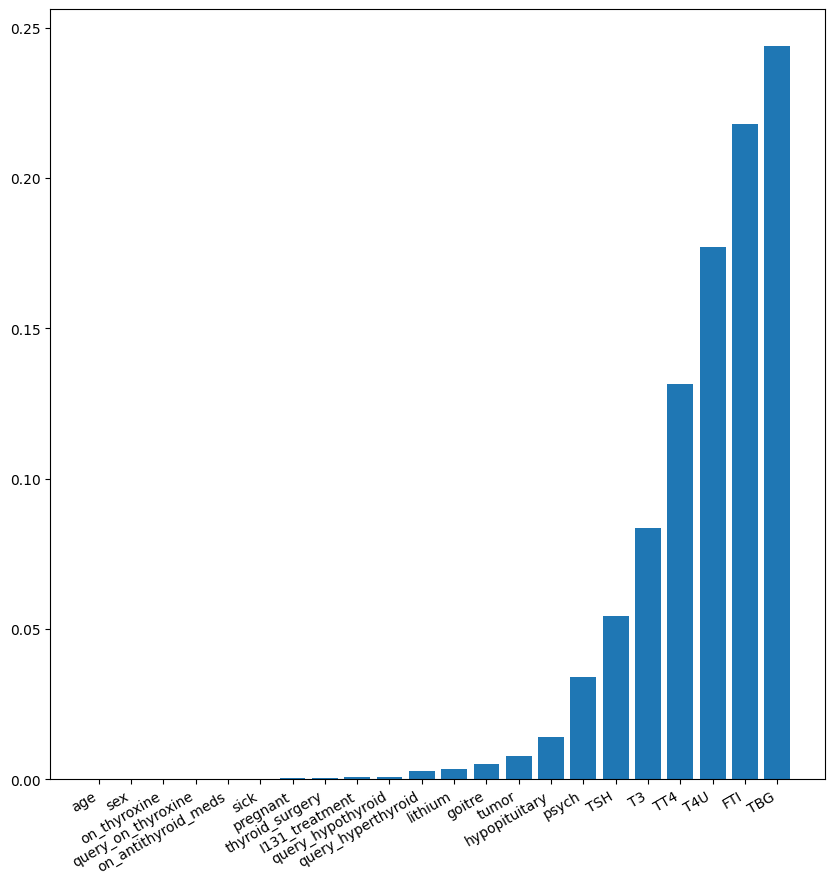

In [ ]:
#gets importance
feature_importance=['age','sex','on_thyroxine','query_on_thyroxine','on_antithyroid_meds','sick','pregnant','thyroid_surgery','I131_treatment','query_hypothyroid','query_hyperthyroid','lithium', 'goitre', 'tumor','hypopituitary','psych','TSH','T3','TT4','T4U','FTI','TBG']
importance = results.importances_mean
importance = np.sort(importance)
#summerize feature importance
for i,v in enumerate(importance):
    i=feature_importance[i]
    print('feature: {:<20} Score: {}'. format(i,v))
#plot important feature

plt.figure(figsize=(10,10))
plt.bar(x=feature_importance, height = importance)
plt.xticks(rotation=30, ha='right')
plt.show()

In [ ]:
x_bal.drop(['age','sex','on_thyroxine','query_on_thyroxine','on_antithyroid_meds','sick','pregnant','thyroid_surgery','I131_treatment','query_hypothyroid','query_hyperthyroid','lithium'],axis=1,inplace=True)


In [ ]:
x_test_bal.drop(['age','sex','on_thyroxine','query_on_thyroxine','on_antithyroid_meds','sick','pregnant','thyroid_surgery','I131_treatment','query_hypothyroid','query_hyperthyroid','lithium'],axis=1,inplace=True)

In [ ]:
x_bal.head()

,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG
0,-0.052423,-0.141125,-0.026185,-0.110163,-0.299928,-1.035646,0.711265,0.129805,0.560399,-0.174949
1,-0.052423,-0.141125,-0.026185,-0.110163,-0.313169,-0.421441,-0.223523,-0.724512,0.281054,-0.174949
2,-0.052423,-0.141125,-0.026185,-0.110163,-0.317395,-1.035646,0.668121,-0.382785,0.944497,-0.174949
3,-0.052423,-0.141125,-0.026185,-0.110163,-0.300773,-0.482861,-0.065328,-2.689440,-1.383373,-0.174949
4,-0.052423,-0.141125,-0.026185,-0.110163,-0.261048,-0.482861,-0.194760,-0.012582,-0.114684,-0.174949


In [ ]:
x_test_bal.head()

,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG
0,-0.052423,-0.141125,-0.026185,-0.110163,-0.295420,0.377026,0.006579,-0.610603,0.467284,-0.174949
1,-0.052423,-0.141125,-0.026185,-0.110163,1.316655,-1.035646,-0.597438,-0.126490,-0.428946,-0.174949
2,-0.052423,-0.141125,-0.026185,-0.110163,0.003780,0.254185,-0.281049,-0.183445,-0.114684,-0.174949
3,-0.052423,-0.141125,-0.026185,-0.110163,-0.300491,-0.605702,-0.683727,-0.496694,-0.347471,-0.174949
4,-0.052423,7.085939,-0.026185,-0.110163,-0.153990,-1.035646,2.091875,3.917275,-0.068126,-0.174949


# checking correlation using Heatmap

<ipython-input-54-1ed622f58e35>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = x.corr()


<Axes: >

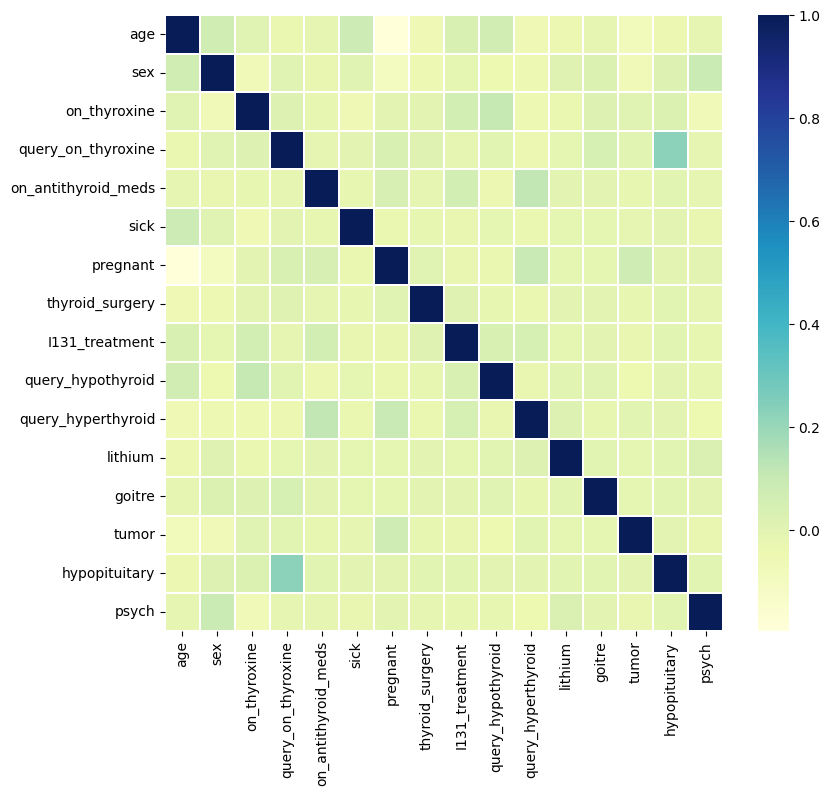

In [ ]:

import seaborn as sns
corrmat = x.corr()
  
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

### RandomForest Model-1

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfr1 = RandomForestClassifier().fit(x_bal,y_bal.values.ravel())
y_pred = rfr1.predict(x_test_bal)
rfr1 = RandomForestClassifier()
#rfr1.fit(x_bal,y_bal)
#y_pred=rfr1.predict(x_test_bal)


In [ ]:
rfr1.fit(x_bal,y_bal.values.ravel())

RandomForestClassifier()

In [ ]:
y_pred = rfr1.predict(x_test_bal)

In [ ]:
print(classification_report(y_test_bal,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.19      0.30       176
           1       0.79      0.97      0.87       176
           2       0.93      0.97      0.95       176
           3       0.82      0.63      0.71       176
           4       0.48      0.88      0.62       176
           5       0.83      0.83      0.83       176
           6       0.63      0.55      0.59       176

    accuracy                           0.72      1232
   macro avg       0.75      0.72      0.69      1232
weighted avg       0.75      0.72      0.69      1232



In [ ]:
train_score = accuracy_score(y_bal,rfr1.predict(x_bal))
train_score

1.0

### XGBClassifier Model





In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_bal,y_bal)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
y_pred=xgb.predict(x_test_bal)

In [ ]:
print(classification_report(y_test_bal,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.11      0.20       176
           1       0.80      0.96      0.87       176
           2       0.95      0.98      0.96       176
           3       0.82      0.66      0.73       176
           4       0.46      0.83      0.60       176
           5       0.81      0.83      0.82       176
           6       0.55      0.53      0.54       176

    accuracy                           0.70      1232
   macro avg       0.73      0.70      0.67      1232
weighted avg       0.73      0.70      0.67      1232



In [ ]:
accuracy_score(y_test_bal,y_pred)

0.7012987012987013

In [ ]:
train_score = accuracy_score(y_bal, xgb.predict(x_bal))
train_score

1.0

### SVC Model

In [ ]:

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

sv= SVC()

In [ ]:
sv.fit(x_bal,y_bal)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [ ]:
y_pred = sv.predict(x_test_bal)

In [ ]:
print(classification_report(y_test_bal,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.73      0.71       176
           1       0.78      0.87      0.82       176
           2       0.72      0.93      0.81       176
           3       0.78      0.55      0.64       176
           4       0.66      0.65      0.65       176
           5       0.70      0.70      0.70       176
           6       0.54      0.46      0.50       176

    accuracy                           0.70      1232
   macro avg       0.70      0.70      0.69      1232
weighted avg       0.70      0.70      0.69      1232



In [ ]:
train_score=accuracy_score(y_bal,sv.predict(x_bal))
train_score

0.7207947927372388

# ANN model

In [ ]:

model = Sequential()

In [ ]:
model.add(Dense(units = 128,activation='relu', input_shape=(10,)))

In [ ]:
model.add(Dense(units = 128,activation='relu', kernel_initializer='random_uniform'))
model.add(Dropout(0.2))
model.add(Dense(units = 126,activation='relu', kernel_initializer='random_uniform'))
model.add(Dropout(0.2))
model.add(Dense(units = 128,activation='relu', kernel_initializer='random_uniform'))

In [ ]:
model.add(Dense(units = 1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1408      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 126)               16254     
                                                                 
 dropout_1 (Dropout)         (None, 126)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               16256     
                                                                 
 dense_4 (Dense)             (None, 1)                 1

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(x_bal,y_bal, validation_data=[x_test_bal,y_test_bal], epochs=15)

Epoch 1/15
92/92 [==============================] - 2s 7ms/step - loss: -3739.0410 - accuracy: 0.1418 - val_loss: -28411.6426 - val_accuracy: 0.1429
Epoch 2/15
92/92 [==============================] - 0s 4ms/step - loss: -535594.2500 - accuracy: 0.1429 - val_loss: -2021196.6250 - val_accuracy: 0.1429
Epoch 3/15
92/92 [==============================] - 0s 4ms/step - loss: -9265072.0000 - accuracy: 0.1429 - val_loss: -23540590.0000 - val_accuracy: 0.1429
Epoch 4/15
92/92 [==============================] - 0s 4ms/step - loss: -63034968.0000 - accuracy: 0.1429 - val_loss: -125777152.0000 - val_accuracy: 0.1429
Epoch 5/15
92/92 [==============================] - 0s 4ms/step - loss: -254406528.0000 - accuracy: 0.1429 - val_loss: -440813792.0000 - val_accuracy: 0.1429
Epoch 6/15
92/92 [==============================] - 0s 4ms/step - loss: -767741376.0000 - accuracy: 0.1429 - val_loss: -1189984000.0000 - val_accuracy: 0.1429
Epoch 7/15
92/92 [==============================] - 0s 4ms/step - los

# testing the model

In [ ]:

rfr1.predict([[0,0,0,0,0.000000,0.0,0.0,1.00,0.0,40.0]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([4])

In [ ]:
sv.predict([[0,0,0,0,0.000000,0.0,0.0,1.00,0.0,40.0]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([5])

In [ ]:
col = ['goitre','tumor','hypopituitary','psych','TSH','T3','TT4','T4U','FTI','TBG']
da = [[0,0,0,0,0.000000,0.0,0.0,1.00,0.0,40.0]]
da1 = pd.DataFrame(data = da, columns=col)
xgb.predict(da1)

array([6])

In [ ]:
model.predict([[0,0,0,0,0.000000,0.0,0.0,1.00,0.0,40.0]])

1/1 [==============================] - 0s 186ms/step


array([[1.]], dtype=float32)

# compare  the model

In [ ]:

print(classification_report(y_test_bal,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.73      0.71       176
           1       0.78      0.87      0.82       176
           2       0.72      0.93      0.81       176
           3       0.78      0.55      0.64       176
           4       0.66      0.65      0.65       176
           5       0.70      0.70      0.70       176
           6       0.54      0.46      0.50       176

    accuracy                           0.70      1232
   macro avg       0.70      0.70      0.69      1232
weighted avg       0.70      0.70      0.69      1232



In [ ]:
train_score= accuracy_score(y_bal,rfr1.predict(x_bal))
train_score

1.0

In [ ]:
y_pred=xgb.predict(x_test_bal)
print(classification_report(y_test_bal,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.11      0.20       176
           1       0.80      0.96      0.87       176
           2       0.95      0.98      0.96       176
           3       0.82      0.66      0.73       176
           4       0.46      0.83      0.60       176
           5       0.81      0.83      0.82       176
           6       0.55      0.53      0.54       176

    accuracy                           0.70      1232
   macro avg       0.73      0.70      0.67      1232
weighted avg       0.73      0.70      0.67      1232



In [ ]:
train_score= accuracy_score(y_bal,xgb.predict(x_bal))
train_score

1.0

In [ ]:
y_pred=sv.predict(x_test_bal)
print(classification_report(y_test_bal,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.73      0.71       176
           1       0.78      0.87      0.82       176
           2       0.72      0.93      0.81       176
           3       0.78      0.55      0.64       176
           4       0.66      0.65      0.65       176
           5       0.70      0.70      0.70       176
           6       0.54      0.46      0.50       176

    accuracy                           0.70      1232
   macro avg       0.70      0.70      0.69      1232
weighted avg       0.70      0.70      0.69      1232



In [ ]:
train_score= accuracy_score(y_bal,sv.predict(x_bal))
train_score

0.7207947927372388

In [ ]:
y_pred=model.predict(x_test_bal)

39/39 [==============================] - 0s 2ms/step


In [ ]:
print(classification_report(y_test_bal,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       176
           1       0.14      1.00      0.25       176
           2       0.00      0.00      0.00       176
           3       0.00      0.00      0.00       176
           4       0.00      0.00      0.00       176
           5       0.00      0.00      0.00       176
           6       0.00      0.00      0.00       176

    accuracy                           0.14      1232
   macro avg       0.02      0.14      0.04      1232
weighted avg       0.02      0.14      0.04      1232



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
accuracy_score(y_test_bal,y_pred)

0.14285714285714285

# comparing the model accuracy before & after applying hyperparameter tuning

In [ ]:

params = {
    'C' : [0.1,  1, 10,100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
      'kernel': ['rbf', 'sqrt']
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
random_svc = RandomizedSearchCV(sv,params, scoring='accuracy',cv=5,n_jobs=-1)
random_svc.fit(x_bal,y_bal)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py", line 180, in fit
    self._validate_params()
  File "/usr/local/lib/python3.9/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.9/dist-packages/sklearn/utils/_param_vali

RandomizedSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['rbf', 'sqrt']},
                   scoring='accuracy')

In [ ]:
random_svc.best_params_

{'kernel': 'rbf', 'gamma': 0.1, 'C': 100}

In [ ]:
sv1=SVC(C =100,gamma=1, kernel= 'rbf')
sv1.fit(x_bal,y_bal)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=100, gamma=1)

In [ ]:
y_pred= sv1.predict(x_test_bal)
print(classification_report(y_test_bal,y_pred))

              precision    recall  f1-score   support

           0       0.56      0.11      0.18       176
           1       0.72      0.91      0.80       176
           2       0.86      0.94      0.90       176
           3       0.76      0.62      0.68       176
           4       0.47      0.84      0.60       176
           5       0.73      0.71      0.72       176
           6       0.59      0.51      0.54       176

    accuracy                           0.66      1232
   macro avg       0.67      0.66      0.63      1232
weighted avg       0.67      0.66      0.63      1232



In [ ]:
train_score= accuracy_score(y_bal,sv1.predict(x_bal))
train_score

0.9150393970537856

# saving the model

In [ ]:

import pickle
pickle.dump(xgb,open('thyroid_1_model.pkl','wb'))

In [ ]:
features = np.array([[0,0,0,0,0.000000,0.0,0.0,1.00,0.0,40.0]])
print(label_encoder.inverse_transform(xgb.predict(features)))

['replacement therapy']


In [ ]:
pickle.dump(label_encoder,open('label_encoder.pkl','wb'))

In [ ]:
data['target'].unique()

array(['miscellaneous', 'hypothyroid conditions', 'binding protein',
       'replacement therapy', 'general health', 'hyperthyroid conditions',
       'antithyroid treatment'], dtype=object)

In [ ]:
y['target'].unique()

array([5, 4, 1, 6, 2, 3, 0])

##model deployment
# Save The Best Model


In [ ]:

import pickle
pickle.dump(sv1,open('thyroid_1_model.pk1','wb'))